## PreProcess Images (Convert to Grayscale)

In [ ]:
import os
from PIL import Image


def convert_and_resize_image(input_image_path, output_image_path, size=(30, 30)):
    with Image.open(input_image_path) as img:
        # Convert image to grayscale (BW)
        bw_image = img.convert('L')
        
        # Resize the image to 30x30 pixels image
        resized_image = bw_image.resize(size)
        
        # Save the resized grayscale image
        resized_image.save(output_image_path)

img_dir = 'assets/nepali-numbers'
bw_image_dir = 'assets/bw-images'
if not os.path.exists(bw_image_dir):
    os.mkdir(bw_image_dir)

for num_dir in os.scandir(img_dir):
    for img in os.scandir(f"{img_dir}/{num_dir.name}"):
        if not os.path.exists(f"{bw_image_dir}/{num_dir.name}"):
            os.mkdir(f"{bw_image_dir}/{num_dir.name}")
        convert_and_resize_image(f"{img_dir}/{num_dir.name}/{img.name}",f"{bw_image_dir}/{num_dir.name}/{img.name}")


Image saved as assets/bw-images/6/86.jpg
Image saved as assets/bw-images/6/111.jpg
Image saved as assets/bw-images/6/82.jpg
Image saved as assets/bw-images/6/138.jpg
Image saved as assets/bw-images/6/157.jpg
Image saved as assets/bw-images/6/153.jpg
Image saved as assets/bw-images/6/95.jpg
Image saved as assets/bw-images/6/127.jpg
Image saved as assets/bw-images/6/128.jpg
Image saved as assets/bw-images/6/159.jpg
Image saved as assets/bw-images/6/155.jpg
Image saved as assets/bw-images/6/106.jpg
Image saved as assets/bw-images/6/144.jpg
Image saved as assets/bw-images/6/130.jpg
Image saved as assets/bw-images/6/35.jpg
Image saved as assets/bw-images/6/6.jpg
Image saved as assets/bw-images/6/151.jpg
Image saved as assets/bw-images/6/67.jpg
Image saved as assets/bw-images/6/108.jpg
Image saved as assets/bw-images/6/123.jpg
Image saved as assets/bw-images/6/137.jpg
Image saved as assets/bw-images/6/98.jpg
Image saved as assets/bw-images/6/36.jpg
Image saved as assets/bw-images/6/16.jpg
Im

## Create DataSet

In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

bw_image_dir = 'assets/bw-images'

batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1/255, 
    validation_split=0.2  
)

train_generator = train_datagen.flow_from_directory(
    bw_image_dir,
    target_size=(30, 30),  
    batch_size=batch_size,
    class_mode='sparse',  
    subset='training',  
    color_mode='grayscale' 
)

validation_generator = train_datagen.flow_from_directory(
    bw_image_dir,
    target_size=(30, 30),
    batch_size=batch_size,
    class_mode='sparse',
    subset='validation',  
    color_mode='grayscale'
)


Found 1278 images belonging to 10 classes.
Found 315 images belonging to 10 classes.


## Define the CNN Model

In [22]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(30, 30, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    # Output Layer (10 classes: 0-9)
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])


## Train the model

In [23]:
# Train the model
from sklearn.model_selection import learning_curve


history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,  
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
)


Epoch 1/10
39/39 [==============================] - 1s 9ms/step - loss: 2.2725 - accuracy: 0.1806 - val_loss: 2.2052 - val_accuracy: 0.3056
Epoch 2/10
39/39 [==============================] - 0s 7ms/step - loss: 1.8732 - accuracy: 0.3660 - val_loss: 1.3628 - val_accuracy: 0.5972
Epoch 3/10
39/39 [==============================] - 0s 7ms/step - loss: 1.0340 - accuracy: 0.6982 - val_loss: 0.9676 - val_accuracy: 0.7361
Epoch 4/10
39/39 [==============================] - 0s 7ms/step - loss: 0.8228 - accuracy: 0.7753 - val_loss: 0.7659 - val_accuracy: 0.7882
Epoch 5/10
39/39 [==============================] - 0s 7ms/step - loss: 0.6564 - accuracy: 0.8218 - val_loss: 0.7405 - val_accuracy: 0.7882
Epoch 6/10
39/39 [==============================] - 0s 8ms/step - loss: 0.5995 - accuracy: 0.8283 - val_loss: 0.6491 - val_accuracy: 0.8299
Epoch 7/10
39/39 [==============================] - 0s 8ms/step - loss: 0.4777 - accuracy: 0.8716 - val_loss: 0.5821 - val_accuracy: 0.8472
Epoch 8/10
39/39 [==

## Evaluate the Model

10/10 [==============================] - 0s 6ms/step - loss: 0.5247 - accuracy: 0.8540
Validation accuracy: 0.8539682626724243


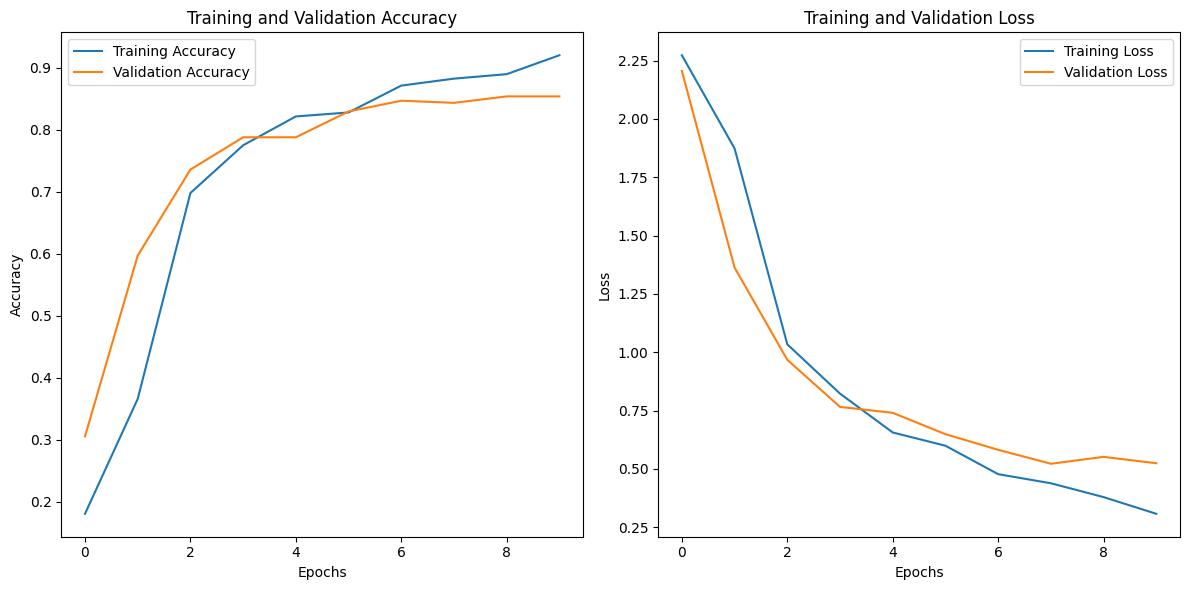

In [24]:
# Evaluate the model on the validation set
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

val_loss, val_acc = model.evaluate(validation_generator)
print(f"Validation accuracy: {val_acc}")


# Plot training and validation accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


## Save Model

In [25]:
model.save('data/digit_recognition_model.keras')


### predict any real image (Inference)

1/1 [==============================] - 0s 36ms/step


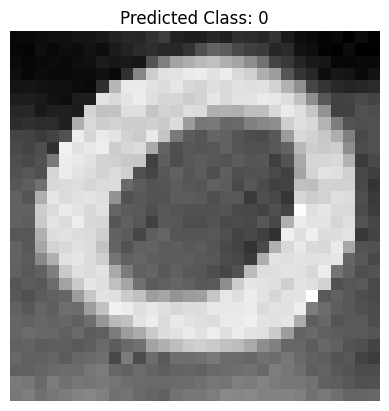

Prediction probabilities for each class:  [[9.64631796e-01 1.28442282e-03 1.50628882e-02 4.20909091e-05
  8.54475729e-06 1.23579682e-07 9.05650668e-04 1.07260095e-02
  6.84832456e-03 4.90065431e-04]]


In [30]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np

model = tf.keras.models.load_model('data/digit_recognition_model.keras')

def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(30, 30), color_mode='grayscale')
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)  #
    return img_array

img_path = 'assets/zero.jpg' 
img_array = preprocess_image(img_path)

predictions = model.predict(img_array)

predicted_class = np.argmax(predictions, axis=1)[0]

# Display the image and predicted class
img = image.load_img(img_path, target_size=(30, 30), color_mode='grayscale')
plt.imshow(img, cmap='gray')
plt.title(f'Predicted Class: {predicted_class}')
plt.axis('off')
plt.show()

# Print the prediction probabilities for each class
print("Prediction probabilities for each class: ", predictions)


In [2]:

def sum(x,y):
    s = x+y
    return s
add = sum(4,5)
print(add)

9
